In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [55]:
df = pd.read_csv("/Users/rahulmeena/Imarticus/GitHub/IMARTICUS/Datasets/class_exercise/Churn_Modelling.csv")

In [56]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [58]:
df=df.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [59]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [60]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [61]:
df.value_counts(['Geography','Gender']).reset_index(name='Count')

,Geography,Gender,Count
0,France,Male,2753
1,France,Female,2261
2,Spain,Male,1388
3,Germany,Male,1316
4,Germany,Female,1193
5,Spain,Female,1089


In [62]:
# Bivariate analysis
geo_exit = pd.crosstab(df["Geography"],df["Exited"]) # contigency table
geo_exit

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


The pd.crosstab() function in pandas is used to create a contingency table (also known as a cross-tabulation) that displays the frequency distribution of two or more categorical variables

In [63]:
pd.crosstab(df["Geography"],df["Exited"],margins=True, margins_name="Total")

Exited,0,1,Total
Geography,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
Total,7963,2037,10000


In [64]:
pd.crosstab(df["Geography"],df["Exited"],margins=True, margins_name="Total", normalize="index")

Exited,0,1
Geography,,
France,0.838452,0.161548
Germany,0.675568,0.324432
Spain,0.833266,0.166734
Total,0.796300,0.203700


Approx ~16% people exited in france and ~84% not exited.

In [65]:
pd.crosstab(df["Geography"],df["Exited"],margins=True, margins_name="Total", normalize="columns")

Exited,0,1,Total
Geography,,,
France,0.527942,0.397644,0.5014
Germany,0.212859,0.399607,0.2509
Spain,0.259199,0.202749,0.2477


Approx 39.7% of exited people are from france.

In [66]:
pd.crosstab(df["Geography"],df["Exited"],margins=True, margins_name="Total", normalize="all")

Exited,0,1,Total
Geography,,,
France,0.4204,0.0810,0.5014
Germany,0.1695,0.0814,0.2509
Spain,0.2064,0.0413,0.2477
Total,0.7963,0.2037,1.0000


In [67]:
# chi-sq test
from scipy.stats import chi2_contingency 

The chi-square test is used to determine whether there is a significant association between categorical variables or whether the observed distribution of data fits an expected distribution.

- Test for Independence: It helps determine if two categorical variables are independent or related.</br>
Example: Checking if gender and product preference are related in a survey.

- Goodness of Fit: It checks whether the observed data matches a theoretical or expected distribution.</br>
Example: Testing if a die is fair by comparing the outcomes of dice rolls to an expected uniform distribution.

In [68]:
chi2_contingency(geo_exit)

Chi2ContingencyResult(statistic=301.25533682434536, pvalue=3.8303176053541544e-66, dof=2, expected_freq=array([[3992.6482, 1021.3518],
       [1997.9167,  511.0833],
       [1972.4351,  504.5649]]))

chi2_contingency is the function in SciPy that performs the Chi-Square Test of Independence on a contingency table.

- Chi-square statistic tells you how much difference there is between observed and expected counts.
- P-value helps determine whether the observed association is statistically significant.
- Degrees of freedom (dof) indicates the number of independent comparisons.
- Expected frequencies show what the frequencies would be if the variables were independent.

### Numerical-Numerical

In [69]:
df.groupby("Exited").agg({"CreditScore": ['mean', 'median', min, max]})

CreditScore                 
              mean median  min  max
Exited                             
0       651.853196  653.0  405  850
1       645.351497  646.0  350  850

In [70]:
# Independent t-test -
# Null hypo-   Creditscore of left people = Credit score of non left people - ( no relation)
# Alternative --Creditscore of left people <> Credit score of non left people - (relation)
from scipy.stats import ttest_ind

Independent t-test is used to determine whether there is a statistically significant difference between the means of two independent groups. This test assumes that the two groups are independent, and it is typically used when you have continuous data.

Hypotheses:

Null Hypothesis (H₀): The means of the two groups are equal.</br>
Alternative Hypothesis (H₁): The means of the two groups are not equal.

In [71]:
left=df[df["Exited"]==1]
not_left=df[df["Exited"]==0]

In [72]:
ttest_ind(left["CreditScore"],not_left["CreditScore"])

TtestResult(statistic=-2.7100778888729833, pvalue=0.006738213892192373, df=9998.0)

Based on p-value less than 0.05. So reject the null hypothesis and accept the alternate hypothesis. (there is relation, i.e variable is important)

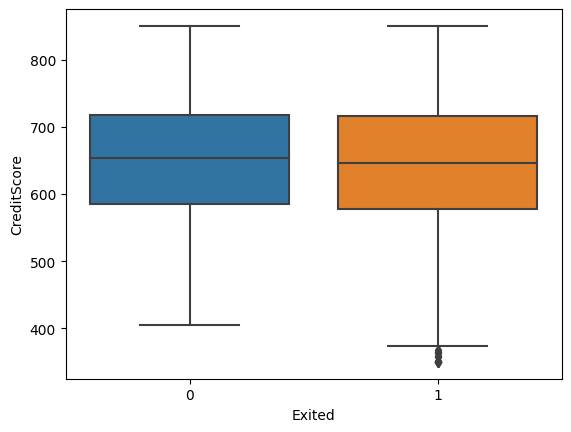

In [73]:
sns.boxplot(x="Exited",y="CreditScore",data=df)
plt.show()

Outliers are very less.

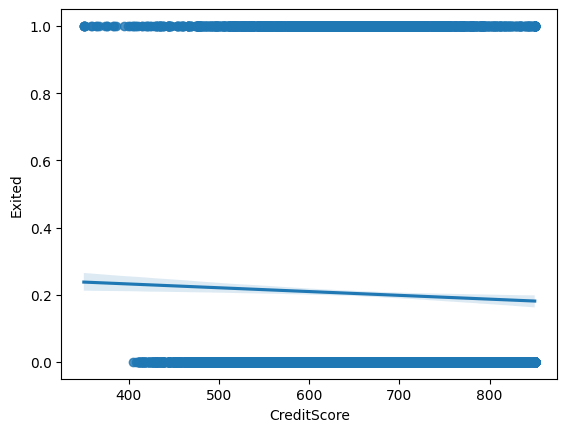

In [74]:
sns.regplot(x='CreditScore', y='Exited', data=df)
plt.show()

### Feature Engineering

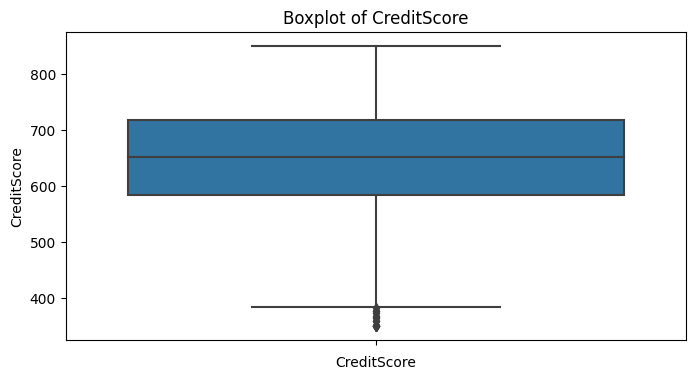

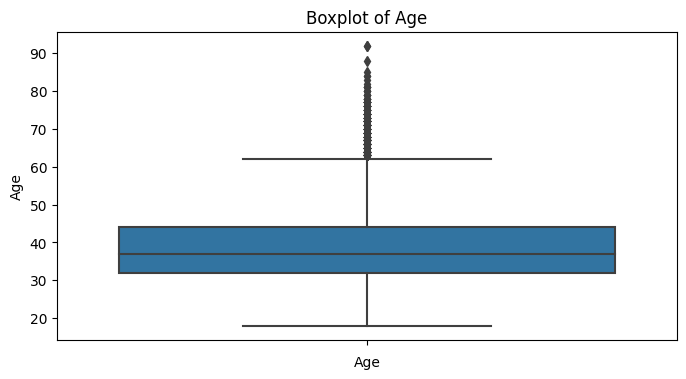

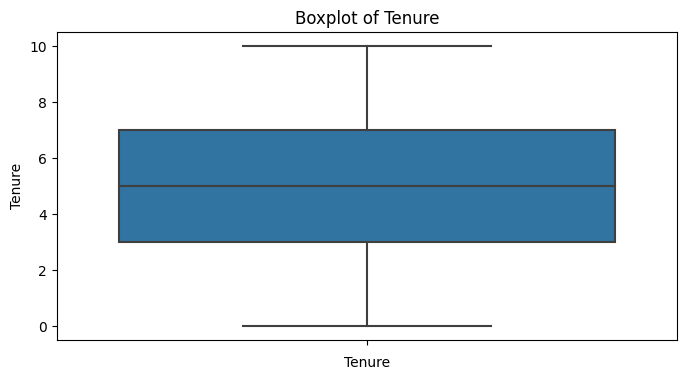

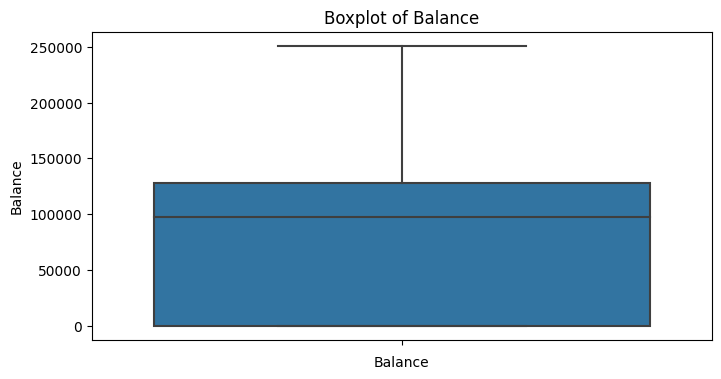

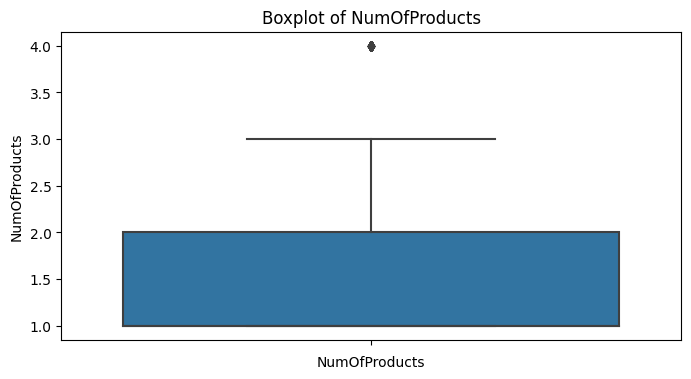

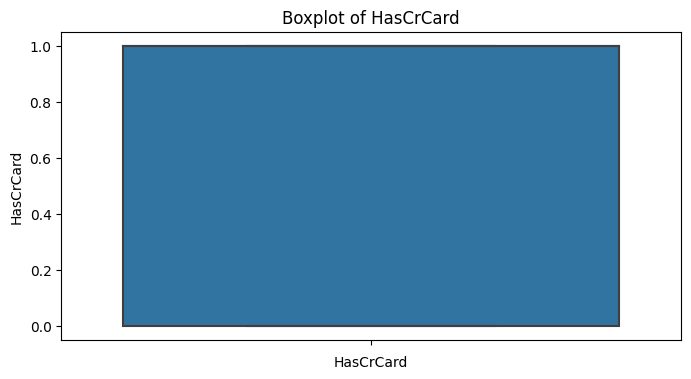

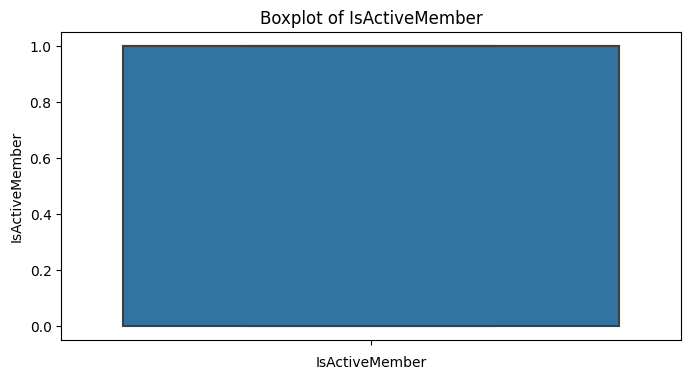

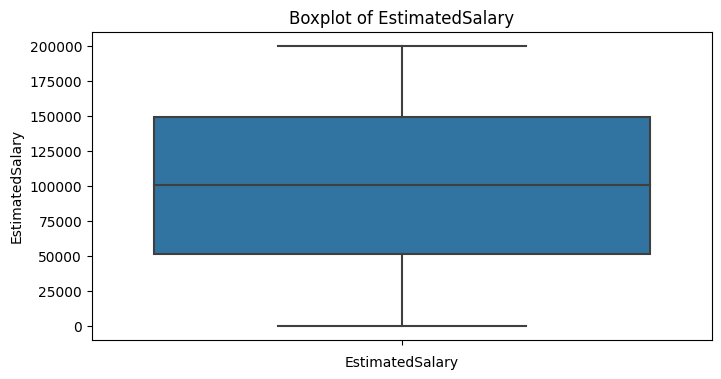

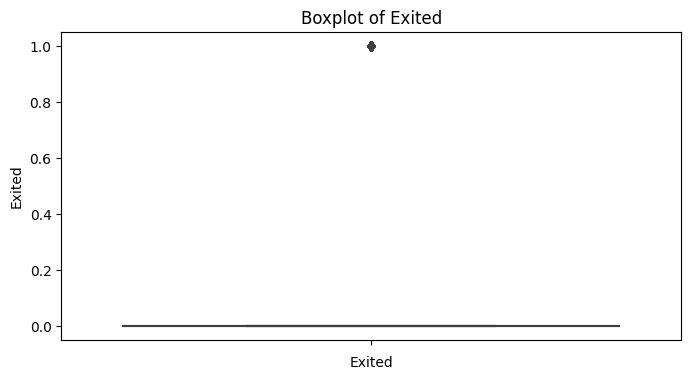

In [75]:
# Outlier treatment
for i in df.columns:
    if df[i].dtypes == "int64" or df[i].dtypes == "float64":
        plt.figure(figsize=(8, 4))  # Adjust the figure size 
        sns.boxplot(y=df[i])
        plt.title(f'Boxplot of {i}')  # Add a title for the boxplot
        plt.xlabel(i)  # Label for the x-axis
        plt.show()


Significant outliers in age column and its important for our problem.

In [76]:
# Tukey method

# Calculate Q1, Q3, and IQR for the 'Age' column
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1

# Define upper and lower bounds
upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)

# Replace outliers with the upper and lower bounds
df['Age'] = df['Age'].clip(lower=lower_bound, upper=upper_bound)

df


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [77]:
# dummy creation
df1=pd.get_dummies(df,columns=['Geography', "Gender"],drop_first=True, dtype="int")
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


## Model Development

In [78]:
y=df1["Exited"]
x=df1.drop(["Exited"],axis=1)

#### train-test-split Dataset

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#### Pre-Processing
**Rescaling**

Rescaling (or feature scaling) is a preprocessing technique used to standardize the range of independent variables (features) so that they fall within a specific scale, typically 0 to 1 or -1 to 1. The purpose of rescaling is to ensure that different features contribute equally to the model training and avoid biases that arise from features with larger numerical values dominating the model.

Techniques
- Min-Max Scaling (Normalization): Rescales data to a specific range, typically [0, 1].
- Standardization (Z-score normalization): Rescales data to have a mean of 0 and a standard deviation of 1.
- Robust Scaling: Uses the median and interquartile range (IQR) instead of mean and standard deviation, making it less sensitive to outliers.

In [80]:
# rescaling
std=StandardScaler()
std.fit(x_train)   # it is learning from the data
x_train1=pd.DataFrame(std.transform(x_train), columns=x_train.columns)
x_test1=pd.DataFrame(std.transform(x_test), columns=x_test.columns)

In [81]:
x_train1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.344595,-0.678909,-0.342170,1.583725,0.819663,0.645981,0.970714,1.248214,-0.575591,1.730732,-1.098232
1,-0.095181,-0.474581,0.698162,1.344106,-0.903352,-1.548034,0.970714,1.521225,1.737346,-0.577790,-1.098232
2,-0.947345,-0.576745,0.351385,-1.222055,0.819663,-1.548034,-1.030169,1.263615,-0.575591,-0.577790,0.910554
3,-0.354987,0.240567,1.044940,-0.618965,-0.903352,0.645981,0.970714,1.646839,1.737346,-0.577790,0.910554
4,0.642668,-0.168089,1.391718,1.152808,0.819663,-1.548034,0.970714,0.875112,-0.575591,-0.577790,0.910554
...,...,...,...,...,...,...,...,...,...,...,...
6995,1.203850,1.568698,1.044940,-0.106936,-0.903352,0.645981,0.970714,-0.545387,-0.575591,-0.577790,0.910554
6996,0.310116,1.977354,-1.382503,-1.222055,-0.903352,0.645981,0.970714,-1.736501,-0.575591,-0.577790,-1.098232
6997,0.860905,-0.065925,-1.382503,-1.222055,2.542677,-1.548034,-1.030169,-0.149259,-0.575591,-0.577790,-1.098232
6998,0.154233,0.444895,1.044940,1.820806,-0.903352,0.645981,-1.030169,-0.057544,-0.575591,-0.577790,0.910554


In [82]:
# training the LogisticRegression on our data
LogReg=LogisticRegression()
LogReg.fit(x_train1,y_train)

LogisticRegression()

In [83]:
# Model Evaluation
pred_train=LogReg.predict(x_train1)
pred_test=LogReg.predict(x_test1)

In [84]:
pd.DataFrame({"Act":y_train,"Pred":pred_train}).head(20)

,Act,Pred
9069,1,0
2603,0,0
7738,0,0
1579,0,0
5058,0,0
5753,0,0
3548,0,0
409,0,1
4097,0,0
6461,0,0


## Confusion Matrix

A confusion matrix is a performance measurement for classification models, showing how well the model is performing by comparing the actual target values to the model’s predictions. It provides a breakdown of the counts of true and false predictions for each class. Let's understand the components.

|                | Predicted Positive (1) | Predicted Negative (0) |
|----------------|------------------------|------------------------|
| **Actual Positive (1)** | True Positive (TP)         | False Negative (FN)        |
| **Actual Negative (0)** | False Positive (FP)        | True Negative (TN)         |


In [85]:
metrics.confusion_matrix(y_train, pred_train)

array([[5347,  200],
       [1078,  375]])

In [86]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5547
           1       0.65      0.26      0.37      1453

    accuracy                           0.82      7000
   macro avg       0.74      0.61      0.63      7000
weighted avg       0.79      0.82      0.78      7000



| **Precision** | **Recall** | **F1-Score** | **Support** |
|:--------------|:-----------|:-------------|:------------|
| Precision is the proportion of true positives out of all predicted positives. | Recall is the proportion of true positives out of all actual positives. | F1-Score is the harmonic mean of Precision and Recall, balancing the two metrics. | Support is the count of true occurrences of each class in the dataset. |
| $ \text{Precision} = \frac{TP}{TP + FP} $ | $ \text{Recall} = \frac{TP}{TP + FN} $ | $ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $ | Support: Number of true instances of each class |


In [87]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2416
           1       0.61      0.24      0.35       584

    accuracy                           0.82      3000
   macro avg       0.72      0.60      0.62      3000
weighted avg       0.79      0.82      0.79      3000



Accuracy is good, but recall is poor for both train and test data for people who exited(1).

As of now our model is predicting exited(1) or not exited(0) based on probability of 0.5(default). We need to change probability

In [88]:
prob_train=pd.DataFrame(LogReg.predict_proba(x_train1), columns=["Prob_0","Prob_1"])
prob_test=pd.DataFrame(LogReg.predict_proba(x_test1), columns=["Prob_0","Prob_1"])
prob_train.head()

,Prob_0,Prob_1
0,0.910610,0.089390
1,0.809287,0.190713
2,0.900521,0.099479
3,0.854620,0.145380
4,0.936773,0.063227


In [89]:
new_pred_train=np.where(prob_train["Prob_1"]>0.2,1,0)
new_pred_test=np.where(prob_test["Prob_1"]>0.2,1,0)

In [90]:
print(metrics.classification_report(y_train,new_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      5547
           1       0.38      0.71      0.49      1453

    accuracy                           0.70      7000
   macro avg       0.64      0.70      0.64      7000
weighted avg       0.79      0.70      0.72      7000



In [91]:
print(metrics.classification_report(y_test,new_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79      2416
           1       0.36      0.73      0.48       584

    accuracy                           0.70      3000
   macro avg       0.64      0.71      0.63      3000
weighted avg       0.81      0.70      0.73      3000



### Key Observations:

1. **Class 0 (Negative Class)**
   - **Precision:** 0.90 → This is still high, meaning that most instances predicted as class 0 are correct.
   - **Recall:** 0.69 → Recall for class 0 has dropped significantly compared to the previous report (from 0.96 to 0.69). This means that some actual negatives are now misclassified as positives.
   - **F1-Score:** 0.78 → The balance between precision and recall is still decent, but lower than before.

2. **Class 1 (Positive Class)**
   - **Precision:** 0.38 → Precision for class 1 has dropped, indicating more false positives (as expected with a lower threshold).
   - **Recall:** 0.71 → This is a significant improvement from 0.26 in the previous report, meaning your model is now capturing many more actual positives.
   - **F1-Score:** 0.49 → The overall performance for class 1 has improved in terms of F1, though it’s still relatively low.

3. **Overall Performance**
   - **Accuracy:** 0.70 → Accuracy has decreased from 0.82 to 0.70, which makes sense given the increased number of false positives.
   - **Macro Average and Weighted Average:** Both averages show a drop in performance, which aligns with the increase in misclassified instances.

### Interpretation:
- **Improved Recall for Class 1:** You've managed to capture a lot more true positives by lowering the threshold (from 0.26 to 0.71). This is crucial if missing positives is more costly for your problem.
- **Lower Precision for Class 1:** More false positives are being classified as class 1, as reflected in the drop in precision (from 0.65 to 0.38). This is the trade-off for increasing recall.
- **Drop in Overall Accuracy:** Accuracy dropped because you are now classifying more positives, but also introducing more errors in the process.

### Balancing Precision and Recall:
In machine learning, improving recall often comes at the cost of reduced precision. The challenge is to find the sweet spot where your model captures the positives without too many false positives.

If your goal is to minimize false negatives (increase recall), you're heading in the right direction. If false positives are more costly, you might need to find a balance by tweaking the threshold further.

Would you like to explore further adjustments or different thresholds for optimizing this trade-off?


Lower Threshold:

- Pros: Increases recall, captures more true positives.
- Cons: Decreases precision, may increase false positives, potentially lowering accuracy.

Higher Threshold:

- Pros: Increases precision, reduces false positives.
- Cons: Decreases recall, may miss true positives, potentially lowering accuracy.

In [92]:
pd.DataFrame({"Act":y_test,"Pred":new_pred_test}).head(20)

,Act,Pred
6252,0,1
4684,0,0
1731,0,1
4742,0,1
4521,0,0
6340,0,0
576,0,1
5202,1,0
6363,0,1
439,0,1


In [93]:
LogReg.score(x_train1,y_train)  # to check the accuracy only

0.8174285714285714

In [94]:
LogReg.score(x_test1,y_test) # to check the accuracy only

0.822

In [95]:
metrics.recall_score(y_train,new_pred_train)  # train recall

0.7068134893324157

In [96]:
# roc and auc
fpr, tpr, thresholds = metrics.roc_curve(y_train, prob_train["Prob_1"])
auc=metrics.roc_auc_score(y_train, prob_train["Prob_1"])

In [97]:
auc

0.7730838181784119

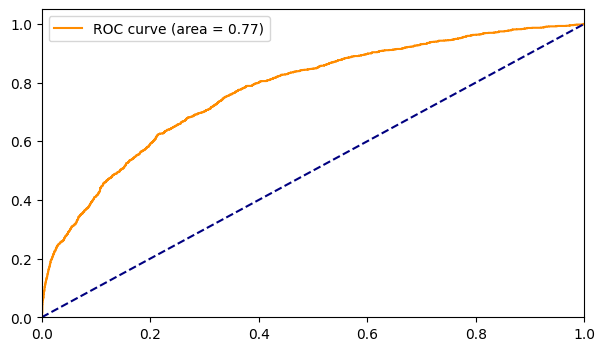

In [98]:
# roc and auc
fpr, tpr, thresholds = metrics.roc_curve(y_train, prob_train["Prob_1"])
auc=metrics.roc_auc_score(y_train, prob_train["Prob_1"])

plt.figure(figsize=(7,4))
plt.plot(fpr, tpr,color='darkorange',label='ROC curve (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend()
plt.show()

- False Positive Rate (FPR): The proportion of actual negatives that are incorrectly classified as positive. 
$$ FPR = FP/(FP+TN) $$

- True Positive Rate (TPR): Also known as sensitivity or recall, it measures the proportion of actual positives that are correctly classified.
$$ TPR = TP/(TP+FN) $$

- Threshold: The probability value used to determine the classification of instances as positive or negative.



In [99]:
LogReg.coef_

array([[-0.07129478,  0.84408747, -0.06246652,  0.16807287, -0.04059486,
        -0.02871944, -0.52834665,  0.00325351,  0.33507535,  0.0357612 ,
        -0.26577811]])

In [100]:
x_train1.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.344595,-0.678909,-0.342170,1.583725,0.819663,0.645981,0.970714,1.248214,-0.575591,1.730732,-1.098232
1,-0.095181,-0.474581,0.698162,1.344106,-0.903352,-1.548034,0.970714,1.521225,1.737346,-0.577790,-1.098232


In [101]:
# Explainable AI -shape value, cassual inference

In [102]:
# creating new dataset to predict whether person will exit or not
new_data=pd.DataFrame({"CreditScore":[820],
              "Age":[65],
              "Tenure":[10],
              "Balance":[12000],
              "NumOfProducts":[3],
              "HasCrCard":[1],
              "IsActiveMember":[1],
              "EstimatedSalary":[8000],
              "Geography_Germany":[0],
              "Geography_Spain":[0],
              "Gender_Male":[1]
              })

In [103]:
new=pd.DataFrame(std.transform(new_data), columns=new_data.columns)
new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,1.744246,2.692502,1.738495,-1.030104,2.542677,0.645981,0.970714,-1.61,-0.575591,-0.57779,0.910554


In [104]:
LogReg.predict_proba(new)

array([[0.70873458, 0.29126542]])

In [105]:
pd.DataFrame(LogReg.coef_, columns=x_train1.columns)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.071295,0.844087,-0.062467,0.168073,-0.040595,-0.028719,-0.528347,0.003254,0.335075,0.035761,-0.265778
